# Artificial Intelligence Systems Lab 6

## Task
1. Датасет о диабете: Diabetes Dataset
2. Загрузите выбранный датасет и выполните предварительную обработку данных. 
3. Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
4. Разделите данные на обучающий и тестовый наборы в соотношении, которое вы считаете подходящим.
5. Реализуйте логистическую регрессию "с нуля" без использования сторонних библиотек, кроме NumPy и Pandas. Ваша реализация логистической регрессии должна включать в себя:
    - Функцию для вычисления гипотезы (sigmoid function).
    - Функцию для вычисления функции потерь (log loss).
    - Метод обучения, который включает в себя градиентный спуск.
    - Возможность варьировать гиперпараметры, такие как коэффициент обучения (learning rate) и количество итераций.
6. Исследование гиперпараметров:
    - Коэффициент обучения (learning rate).
    - Количество итераций обучения.
    - Метод оптимизации (например, градиентный спуск или оптимизация Ньютона).
7. Оценка модели: Для каждой комбинации гиперпараметров оцените производительность модели на тестовом наборе данных, используя метрики, такие как accuracy, precision, recall и F1-Score.


---
### Задание 1
    Датасет о диабете: Diabetes Dataset
---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


---
### Задание 2
    Загрузите выбранный датасет и выполните предварительную обработку данных. 
---
### Задание 3
    Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
---


In [3]:

print('Missing values check')
print(dataset.isnull().sum())

Missing values check
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
def encode_categorical_data(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            data[column] = data[column].astype('category').cat.codes


encode_categorical_data(dataset)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
def normalize_data(data):
    for column in data.columns:
        data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())


normalize_data(dataset)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


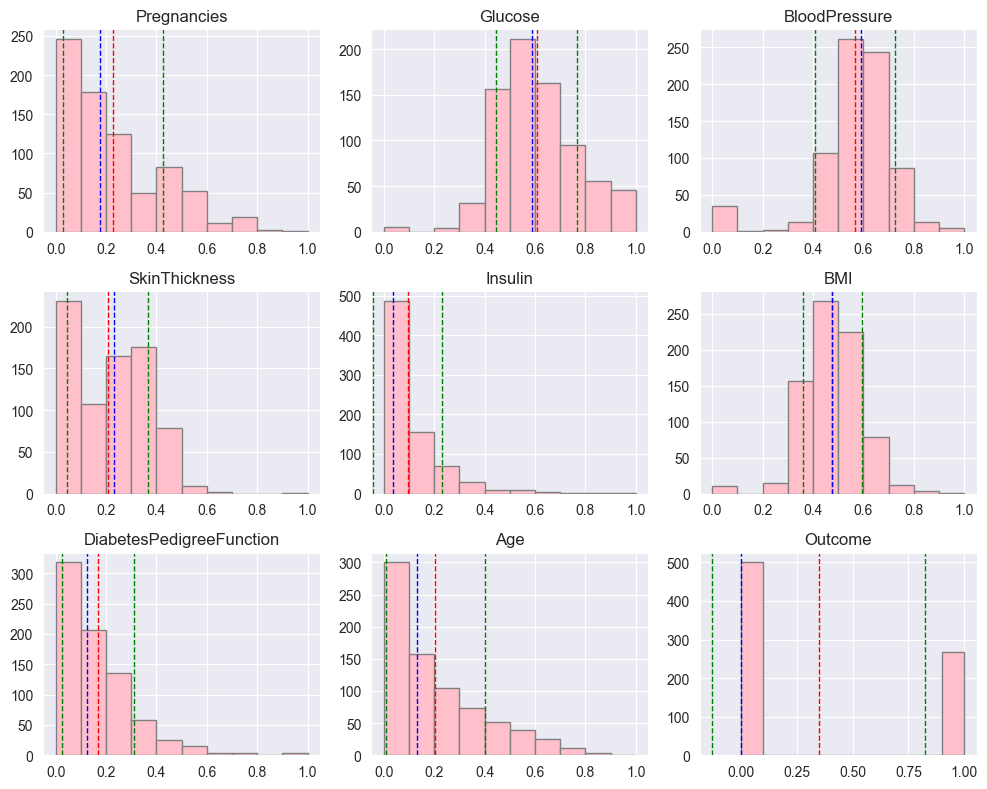

In [7]:
frame = plt.figure(figsize=(10, 8))
intervals = 1 + np.log2(len(dataset))
numerical_columns = dataset.select_dtypes(include=[np.number])
for column in numerical_columns.columns:
    tmp = frame.add_subplot(3, 3, list(numerical_columns.columns).index(column) + 1)
    column_data = dataset[column]
    std_value = column_data.std()
    mean_value = column_data.mean()
    median_value = column_data.median()
    tmp.hist(column_data, bins=int(intervals), color='pink', edgecolor='gray')

    tmp.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label='Mean')
    tmp.axvline(mean_value + std_value, color='green', linestyle='dashed', linewidth=1, label='Mean + 1 STD')
    tmp.axvline(mean_value - std_value, color='green', linestyle='dashed', linewidth=1, label='Mean - 1 STD')
    tmp.axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label='Median')
    tmp.set_title(column)

plt.tight_layout()
plt.show()

In [8]:
print('Quantiles of each numerical column')
print(numerical_columns.quantile([0.25, 0.5, 0.75]))

Quantiles of each numerical column
      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0.25     0.058824  0.497487       0.508197       0.000000  0.000000  0.406855   
0.50     0.176471  0.587940       0.590164       0.232323  0.036052  0.476900   
0.75     0.352941  0.704774       0.655738       0.323232  0.150414  0.545455   

      DiabetesPedigreeFunction       Age  Outcome  
0.25                  0.070773  0.050000      0.0  
0.50                  0.125747  0.133333      0.0  
0.75                  0.234095  0.333333      1.0  


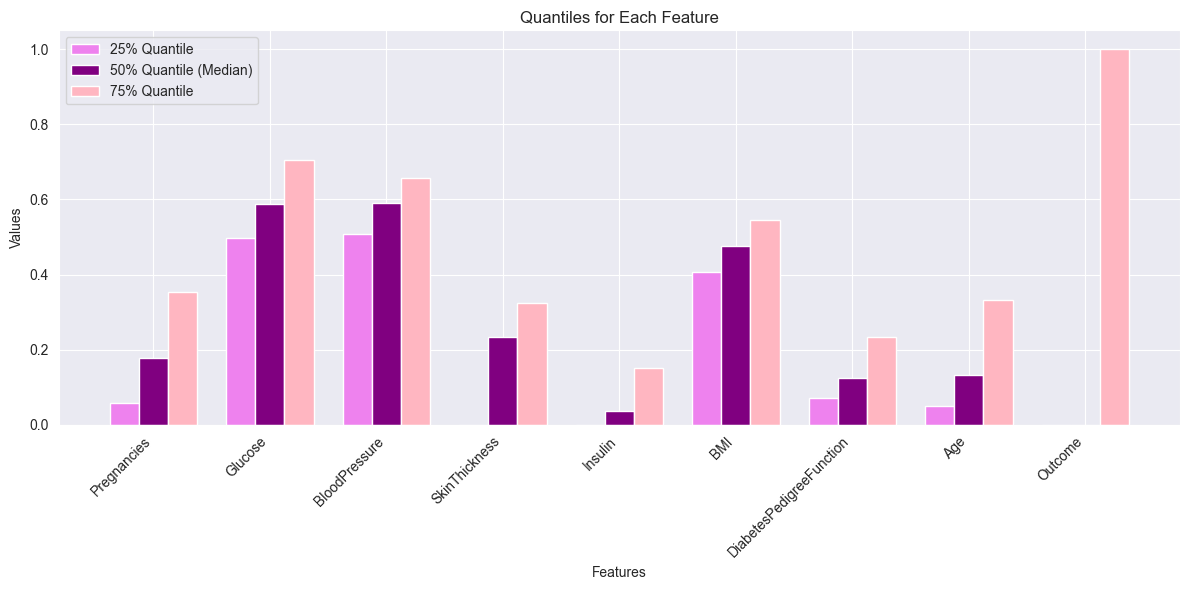

In [17]:
quantiles = numerical_columns.quantile([0.25, 0.5, 0.75])

fig, ax = plt.subplots(figsize=(12, 6))

x = numerical_columns.columns
bar_width = 0.25

x_indexes = np.arange(len(x))
x_25 = x_indexes - bar_width
x_50 = x_indexes
x_75 = x_indexes + bar_width

ax.bar(x_25, quantiles.loc[0.25], width=bar_width, label='25% Quantile', color='violet')
ax.bar(x_50, quantiles.loc[0.5], width=bar_width, label='50% Quantile (Median)', color='purple')
ax.bar(x_75, quantiles.loc[0.75], width=bar_width, label='75% Quantile', color='lightpink')

ax.set_xticks(x_indexes)
ax.set_xticklabels(x, rotation=45, ha='right')
ax.set_title('Quantiles for Each Feature')
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

---
### Задание 4
    Разделите данные на обучающий и тестовый наборы в соотношении, которое вы считаете подходящим.
---


In [15]:

train_dataset = dataset[:int(len(dataset) * 0.8)]
test_dataset = dataset[int(len(dataset) * 0.8):]

X_train = train_dataset.drop('Outcome', axis=1)
y_train = train_dataset['Outcome']
X_test = test_dataset.drop('Outcome', axis=1)
y_test = test_dataset['Outcome']

---
### Задание 5
    Реализуйте логистическую регрессию "с нуля" без использования сторонних библиотек, кроме NumPy и Pandas. Ваша реализация логистической регрессии должна включать в себя:
    - Функцию для вычисления гипотезы (sigmoid function).
    - Функцию для вычисления функции потерь (log loss).
    - Метод обучения, который включает в себя градиентный спуск.
    - Возможность варьировать гиперпараметры, такие как коэффициент обучения (learning rate) и количество итераций.
---


In [54]:
from sklearn.linear_model import LogisticRegression
import numpy as np


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def log_loss(y, y_pred):
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    m = len(y)
    return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m


def train_logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    weights = np.zeros(X.shape[1])
    losses = []

    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / len(y)
        weights -= learning_rate * gradient
        loss = log_loss(y, predictions)
        losses.append(loss)

    return weights, losses


def predict(X, weights, threshold=0.4):
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= threshold).astype(int)


learning_rate = 0.01
iterations = 5000
weights, losses = train_logistic_regression(X_train, y_train, learning_rate, iterations)


predictions = predict(X_test, weights)

# Это для проверки себя же
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

predictions_custom = predict(X_test, weights)
accuracy_custom = np.mean(predictions_custom == y_test) * 100
print(f"Accuracy for Custom Logistic Regression: {accuracy_custom:.2f}%")

# Для модели из sklearn
y_pred_sklearn = logmodel.predict(X_test)
accuracy_sklearn = np.mean(y_pred_sklearn == y_test) * 100
print(f"Accuracy for Sklearn Logistic Regression: {accuracy_sklearn:.2f}%")


Accuracy for Custom Logistic Regression: 68.18%
Accuracy for Sklearn Logistic Regression: 76.62%


---
### Задание 6
    Исследование гиперпараметров:
    - Коэффициент обучения (learning rate).
    - Количество итераций обучения.
---
### Задание 7
    Оценка модели: Для каждой комбинации гиперпараметров оцените производительность модели на тестовом наборе данных, используя метрики, такие как accuracy,precision, recall и F1-Score.
---
    

In [55]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

learning_rates = [0.05, 0.01, 0.1]
iterations_list = [1000, 5000, 10000]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for iter_count in iterations_list:
        weights, losses = train_logistic_regression(X_train, y_train, learning_rate=lr, iterations=iter_count)
        predictions = predict(X_test, weights)

        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, zero_division=1)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)

        print(f"Learning rate: {lr}, Iterations: {iter_count} =>")
        print(f"  Accuracy: {accuracy:.8f}")
        print(f"  Precision: {precision:.8f}")
        print(f"  Recall: {recall:.8f}")
        print(f"  F1-Score: {f1:.8f}")
        print("-" * 50)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {"learning_rate": lr, "iterations": iter_count}

print("\nBest Hyperparameters found:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.8f}")

Learning rate: 0.05, Iterations: 1000 =>
  Accuracy: 0.68181818
  Precision: 0.56000000
  Recall: 0.50909091
  F1-Score: 0.53333333
--------------------------------------------------
Learning rate: 0.05, Iterations: 5000 =>
  Accuracy: 0.70129870
  Precision: 0.58181818
  Recall: 0.58181818
  F1-Score: 0.58181818
--------------------------------------------------
Learning rate: 0.05, Iterations: 10000 =>
  Accuracy: 0.72077922
  Precision: 0.61111111
  Recall: 0.60000000
  F1-Score: 0.60550459
--------------------------------------------------
Learning rate: 0.01, Iterations: 1000 =>
  Accuracy: 0.42207792
  Precision: 0.20689655
  Recall: 0.21818182
  F1-Score: 0.21238938
--------------------------------------------------
Learning rate: 0.01, Iterations: 5000 =>
  Accuracy: 0.68181818
  Precision: 0.56000000
  Recall: 0.50909091
  F1-Score: 0.53333333
--------------------------------------------------
Learning rate: 0.01, Iterations: 10000 =>
  Accuracy: 0.69480519
  Precision: 0.5769